In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras_preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

In [59]:
from glob import glob
CATEGORIES = glob("Dataset/Train/*")

for i in  range(len(CATEGORIES)):
    CATEGORIES[i] = CATEGORIES[i][14:]
    
DATADIR_train = "Dataset/Train/"
DATADIR_valid = "Dataset/Valid/"
DATADIR_test = "Dataset/Test/"


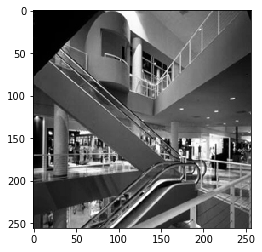

In [56]:
for categories in CATEGORIES:
    path = os.path.join(DATADIR_train, categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [57]:
print(img_array.shape)

(256, 256)


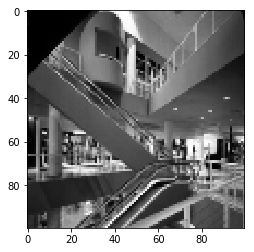

In [58]:
img_size = 100

plt.imshow(new_array,cmap = 'gray')
plt.show()

In [63]:
training_data = []
validation_data = []
testing_data = []

def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_train, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
def create_validation_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_valid, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR_test, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()
create_validation_data()
create_testing_data()

In [64]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

10970
2310
2310


In [72]:
import random
random.shuffle(training_data)
random.shuffle(validation_data)

In [25]:
for sample in training_data[:10]:
    print(sample[1])

24
40
51
66
12
38
24
29
35
65


In [73]:
x_train = []
y_train = []
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
 
x_valid = []
y_valid = []
for features,label in validation_data:
    x_valid.append(features)
    y_valid.append(label)

X_train = np.array(x_train).reshape(-1,img_size,img_size,1)
X_valid = np.array(x_valid).reshape(-1,img_size,img_size,1)


In [74]:
X_train = X_train.astype('float32')
X_train /= 255
print(X_train.shape)
print(X_train.shape[0], 'train_samples')

(10970, 100, 100, 1)
10970 train_samples


In [75]:
X_valid = X_valid.astype('float32')
X_valid /= 255
print(X_valid.shape)
print(X_valid.shape[0], 'valid_samples')

(2310, 100, 100, 1)
2310 valid_samples


In [79]:
Y_train = np_utils.to_categorical(y_train,67)
Y_valid = np_utils.to_categorical(y_valid,67)

In [83]:
batch_size = 25
epochs = 20
channels = 1
conv = 3
maxpool = 2
filters = 32
classes = 67

model = Sequential() 
model.add(Convolution2D(filters,(conv,conv),border_mode='valid',input_shape=(img_size,img_size,1)))
convout1=Activation('relu')
model.add(convout1)
model.add(Convolution2D(filters,conv,conv))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size= (maxpool, maxpool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 73728)             0         
__________

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]


In [85]:
import time

t0= time.time()
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=epochs, 
          verbose=1,validation_data=(X_valid,Y_valid))

print(time.time()-t0)

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 10970 samples, validate on 2310 samples
Epoch 1/20
10970/10970 [==============================] - 133s 12ms/step - loss: 3.6913 - acc: 0.1014 - val_loss: 3.5992 - val_acc: 0.1303
Epoch 2/20
10970/10970 [==============================] - 134s 12ms/step - loss: 3.2391 - acc: 0.1819 - val_loss: 3.4401 - val_acc: 0.1455
Epoch 3/20
10970/10970 [==============================] - 136s 12ms/step - loss: 2.5918 - acc: 0.3163 - val_loss: 3.5711 - val_acc: 0.1403
Epoch 4/20
10970/10970 [==============================] - 134s 12ms/step - loss: 1.9893 - acc: 0.4488 - val_loss: 3.7757 - val_acc: 0.1424
Epoch 5/20
10970/10970 [==============================] - 131s 12ms/step - loss: 1.5066 - acc: 0.5658 - val_loss: 4.1906 - val_acc: 0.1442
Epoch 6/20
10970/10970 [==============================] - 131s 12ms/step - loss: 1.1624 - acc: 0.6568 - val_loss: 4.4595 - val_acc: 0.1342
Epoch 7/20
10970/10970 [==============================] - 131s 12ms/step - loss: 0.9635 - acc: 0.7082 - val_loss: 4.8

In [87]:
x_test = []
y_test = []
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    
X_test = np.array(x_test).reshape(-1,img_size,img_size,1)

X_test = X_test.astype('float32')
X_test /= 255
print(X_test.shape)
print(X_test.shape[0], 'test_samples')

Y_test = np_utils.to_categorical(y_test,67)



(2310, 100, 100, 1)
2310 test_samples


In [88]:

score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  6.963236044186019
Test accuracy:  0.11558441558441558


In [89]:
print(model.predict_classes(X_test[1:6]))
print(Y_test[1:6])

[60  2 60 45 11]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0